# Question 3

In [1]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt # for plots
import h5py # to be able to use v 7.3 .mat file in the Python 
from scipy.stats import norm # for standard normal cdf

/Users/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# QUESTION 3
print('QUESTION 3\n')

QUESTION 3



In [3]:
with h5py.File('hw3_data2.mat', 'r') as file:
    data_keys = list(file.keys())

data = dict()
with h5py.File('hw3_data2.mat', 'r') as file:
        for key in data_keys:
            data[key] = np.array(file[key])

In [4]:
Yn = data['Yn'].flatten()
Xn = data['Xn'].T
print('Shape of Yn:', np.shape(Yn))
print('Shape of Xn:', np.shape(Xn))

Shape of Yn: (1000,)
Shape of Xn: (1000, 100)


In [5]:
# PART A
print('PART A')

PART A


In [6]:
def ridge(y, X, lambda_):
    """
    Given data labels and regressors, learns an optimal weight
    vector according to the ridge regression formulation.
    Args:
        y: The data labels
        X: The regressors
        lambda_: The regularization parameter
    Returns 
        w_optimal: The optimal weight vector
    """
    K = np.shape(X)[1]
    temp = np.linalg.inv(X.T.dot(X) + lambda_ * np.eye(K))
    w_optimal = temp.dot(X.T).dot(y)
    return w_optimal

In [7]:
def compute_R2(Y, pred):
    """
    Tests a given linearized model by computing the coefficient
    of determination (R^2). R^2 is computed as the square of the 
    Pearson correlation between the labels and the predictions.
    Args:
        Y: The data labels
        pred: The predicted valus
    Returns:
        R2: The coefficient of determination
    """
    pearson = np.corrcoef(Y, pred)[0, 1]
    R2 = pearson ** 2
    return R2

In [8]:
def cross_validation(y, X, k_fold, lambda_arr):
    """
    Performs k fold cross validation with three way split in each
    iteration. The aim is to tune the ridge regression's regularizer,
    lambda. Hence each value in an array of lambda values is integrated
    into the model and coefficient of determination (R^2) is calculated
    for each case. 
    Args:
        y: The data labels
        X: The regressors
        k_fold: Number of folds in cross validation
        lambda_arr: The regularization parameters to select from
    Returns:
        dict_valid: The R^2 values calculated in the validation
            set for each fold and lambda value, stored as a dictionary.
        dict_test: The R^2 values calculated in the test set 
            for each fold and lambda value, stored as a dictionary.
    """
    N = np.size(y)
    idx_unit = int(N / k_fold) 
    dict_valid = dict()
    dict_test = dict()
    for i in range(k_fold):
        valid_start = i * idx_unit
        test_start = (i + 1) * idx_unit
        train_start = (i + 2) * idx_unit
        valid_indices = np.arange(valid_start, test_start) % N
        test_indices = np.arange(test_start, train_start) % N
        train_indices = np.arange(train_start, N + valid_start) % N
        y_valid = y[valid_indices]
        X_valid = X[valid_indices]
        y_test = y[test_indices]
        X_test = X[test_indices]
        y_train = y[train_indices]
        X_train = X[train_indices]
        for lambda_ in lambda_arr:
            w = ridge(y_train, X_train, lambda_)
            dict_valid.setdefault(lambda_, []).append(compute_R2(y_valid, X_valid.dot(w)))
            dict_test.setdefault(lambda_, []).append(compute_R2(y_test, X_test.dot(w)))
    dict_valid = dict((k, np.mean(v)) for k, v in dict_valid.items())
    dict_test = dict((k, np.mean(v)) for k, v in dict_test.items())
    return dict_valid, dict_test

In [9]:
K_FOLD = 10

In [10]:
lambda_arr = np.logspace(0, 12, num=500, base=10)
# Takes about a minute to execute 
dict_valid, dict_test = cross_validation(Yn, Xn, K_FOLD, lambda_arr)

In [11]:
lambda_optimal = max(dict_valid, key=lambda k: dict_valid[k])
print('Optimal lambda:', lambda_optimal,
      '\nCorresponding R^2 in validation set:', dict_valid[lambda_optimal], 
      '\nCorresponding R^2 in test set:', dict_test[lambda_optimal])

Optimal lambda: 395.5436244734702 
Corresponding R^2 in validation set: 0.15259887784859996 
Corresponding R^2 in test set: 0.16042061044928463


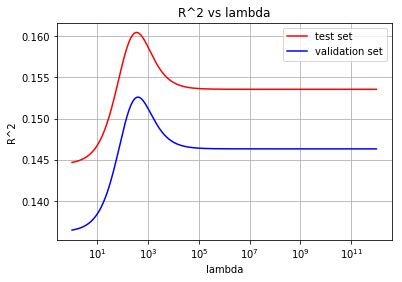

In [12]:
figure_num = 0
lists1 = sorted(dict_valid.items()) # list of tuples sorted by key
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(dict_test.items()) 
x2, y2 = zip(*lists2) 
plt.figure(figure_num)
figure_num += 1
plt.plot(x2, y2, color='r')
plt.plot(x1, y1, color='b')
plt.legend(['test set', 'validation set',])
plt.ylabel('R^2')
plt.xlabel('lambda')
plt.title('R^2 vs lambda')
plt.xscale('log')
plt.grid()
plt.show(block=False)

In [13]:
# PART B
print('PART B')

PART B


In [14]:
NUM_ITER = 500 # number of bootstrap iterations
N = np.size(Yn) # number of samples 

In [15]:
np.random.seed(7) # to be able to reproduce the results
w_bootstrap_OLS = []
for _ in range(NUM_ITER):
    # draw N samples with replacement 
    indices = np.arange(N)
    bootstrap_indices = np.random.choice(indices, N)
    # genereate the respective bootstrap labels and regressors
    y_bootstrap = Yn[bootstrap_indices]
    X_bootstrap = Xn[bootstrap_indices]
    w_OLS = ridge(y_bootstrap, X_bootstrap, 0)
    w_bootstrap_OLS.append(w_OLS)
w_bootstrap_OLS = np.array(w_bootstrap_OLS).T # now rows indicate regressors

In [16]:
x_vals = np.arange(1, 101)
w_mean_OLS = np.mean(w_bootstrap_OLS, axis=1)
w_std_OLS = np.std(w_bootstrap_OLS, axis=1)

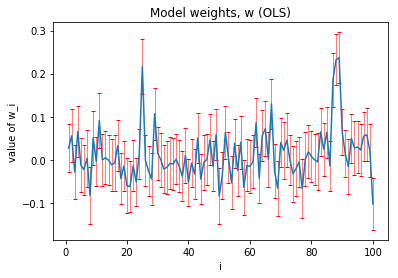

In [17]:
plt.figure(figure_num)
figure_num += 1
plt.errorbar(x_vals, w_mean_OLS, yerr=2 * w_std_OLS, ecolor='r',
             elinewidth=0.5, capsize=2)
plt.title('Model weights, w (OLS)')
plt.xlabel('i')
plt.ylabel('value of w_i')
plt.show(block=False)

In [18]:
z_vals = w_mean_OLS / w_std_OLS
p_vals = 2 * (1 - norm.cdf(np.abs(z_vals)))
significant_OLS = np.argwhere(p_vals < 0.05).flatten()
print('Indices of the parameters that are significantly different than 0:\n', 
      significant_OLS)

Indices of the parameters that are significantly different than 0:
 [ 3  7 10 20 24 28 48 49 51 57 61 64 66 68 76 82 84 86 87 88 89 99]


In [19]:
# PART C
print('PART C')

PART C


In [20]:
np.random.seed(7) # to be able to reproduce the results
w_bootstrap_ridge = []
for _ in range(NUM_ITER):
    # draw N samples with replacement 
    indices = np.arange(N)
    bootstrap_indices = np.random.choice(indices, N)
    # genereate the respective bootstrap labels and regressors
    y_bootstrap = Yn[bootstrap_indices]
    X_bootstrap = Xn[bootstrap_indices]
    w_ridge = ridge(y_bootstrap, X_bootstrap, lambda_optimal)
    w_bootstrap_ridge.append(w_ridge)
w_bootstrap_ridge = np.array(w_bootstrap_ridge).T # now rows indicate regressors

In [21]:
w_mean_ridge = np.mean(w_bootstrap_ridge, axis=1)
w_std_ridge = np.std(w_bootstrap_ridge, axis=1)

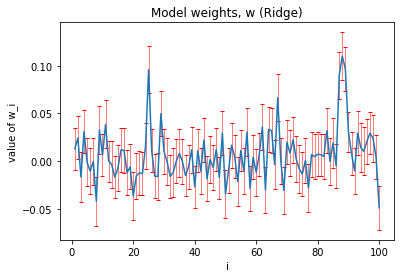

In [22]:
plt.figure(figure_num)
figure_num += 1
plt.errorbar(x_vals, w_mean_ridge, yerr=2 * w_std_ridge, 
             ecolor='r', elinewidth=0.5, capsize=2)
plt.title('Model weights, w (Ridge)')
plt.xlabel('i')
plt.ylabel('value of w_i')
plt.show(block=False)

In [23]:
z_vals = w_mean_ridge / w_std_ridge
p_vals = 2 * (1 - norm.cdf(np.abs(z_vals)))
significant_ridge = np.argwhere(p_vals < 0.05).flatten()
print('Indices of the parameters that are significantly different than 0:\n', 
      significant_ridge)

Indices of the parameters that are significantly different than 0:
 [ 1  3  7  8 10 19 24 28 39 48 49 56 57 61 62 63 64 66 68 76 82 86 87 88
 89 92 96 97 99]
